## Self learning

This Notebook answeres the question:

What is the relationship between years of professional coding experience and total compensation across the top 10 different countries?


- Import Libraries: Start by importing libraries you'll need for data manipulation, analysis, and visualization.
- Load Data (Optional): If the data is stored in the "data" folder, use appropriate functions to load it into the notebook environment.
- Data Understanding: Briefly describe the data, including column names and data types.
- Data Preparation: This will involve handling missing values, converting data types if needed, and cleaning any inconsistencies.
- Exploratory Data Analysis (EDA): Perform relevant Exploratory Data Analysis (EDA) techniques like descriptive statistics, visualizations (histograms, scatter plots) to understand the distribution of variables and relationships between them.
- Modeling (Optional): Depending on the question, you might choose to use statistical tests, correlations, or even simple machine learning models (e.g., linear regression). Clearly explain the chosen approach and why it's suitable.
- Visualization: Create clear and impactful visualizations to communicate your findings visually (bar charts, line graphs, heatmaps).
- Results and Conclusion: Summarize your key findings related to the specific business question being addressed in the notebook. Tie back these findings to the initial question and the data you analyzed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


df_schema= pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_schema.csv')
df_public = pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_public.csv')

df_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [2]:
df_public.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Data Understanding

The most important variables are: 

- EdLevel (Developer's education level)
- LearnCode (How the developer learned to code)
- LearnCodeOnline (Whether the developer learned to code through online resources)
- TechDoc (Usage of technical documentation as a learning resource)

In [3]:
# let's create the dataframe we need from df_public
df_q3 = df_public[[ 'YearsCodePro', 'Country', 'CompTotal']].copy()

df_q3.head(20)

,YearsCodePro,Country,CompTotal
0,NaN,United States of America,NaN
1,17,United Kingdom of Great Britain and Northern I...,NaN
2,27,United Kingdom of Great Britain and Northern I...,NaN
3,NaN,Canada,NaN
4,NaN,Norway,NaN
5,NaN,United States of America,NaN
6,7,United States of America,NaN
7,NaN,Uzbekistan,NaN
8,NaN,United Kingdom of Great Britain and Northern I...,NaN
9,11,Serbia,NaN


In [4]:
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  51610 non-null  object 
 1   Country       58930 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


## Data Preparation

Since the salary is the target variable, we have two options.The first is we could fill the NaN values with the mean value of the entered data. The Problem is, that we only have a third of the values filled in. That leads us two option two which ist to drop the NaN values of CompTotal.  

In [5]:
df_q3 = df_q3.dropna(subset=['CompTotal'])

In [6]:
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  33617 non-null  object 
 1   Country       33740 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


 The column YearsCodePro column should have a int64/32 value when we analyze it a little we see that if the user leraned coding less then a year the answer was 'less then a year'. We can transfer that to 0 since the user didn't coded a year at all. Also we could bin them together into 7 labels.

In [7]:
df_q3['YearsCodePro'] = df_q3['YearsCodePro'].replace('Less than 1 year', 0)

df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  33617 non-null  object 
 1   Country       33740 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


Now that there are only 133 values missing we can compute the mean of that column and fill the NaN values with it. 

In [8]:
# Convert the column to numeric (if needed)
df_q3['YearsCodePro'] = pd.to_numeric(df_q3['YearsCodePro'], errors='coerce')
# Calculate the mean, ignoring NaN values
mean_value = df_q3['YearsCodePro'].mean()

# Fill NaN values with the mean
df_q3['YearsCodePro'] = df_q3['YearsCodePro'].fillna(mean_value)

df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  33740 non-null  float64
 1   Country       33740 non-null  object 
 2   CompTotal     33740 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.0+ MB


Now we should transfer the categorical values of country into numerical. Since the Country column isn't in an inherent order we should use One-Hot Encoding.Also we would only like to see the top 5 countries 

In [9]:
# Step 1: Identify the top 10 countries based on the count
top_countries = df_q3['Country'].value_counts().nlargest(11).index

# Step 2: Filter the DataFrame to keep only the top 10 countries
df_q3 = df_q3[df_q3['Country'].isin(top_countries)]

# One-hot encode the 'Country' column
df_q3_encoded = pd.get_dummies(df_q3, columns=['Country'], drop_first=True)


In [10]:
print('YearsCodePro Max:', df_q3_encoded['YearsCodePro'].max())
print('YearsCodePro Min:', df_q3_encoded['YearsCodePro'].min())
print('CompTotal Max:',df_q3_encoded['CompTotal'].max())
print('CompTotal Min:',df_q3_encoded['CompTotal'].min())

YearsCodePro Max: 50.0
YearsCodePro Min: 0.0
CompTotal Max: 1111111111111111.0
CompTotal Min: 0.0


We can see that the total comp value is way above a reasonable value for the salar. So we should cap it at a value of 300000. 

In [11]:
df_q3_encoded['CompTotal'] = df_q3_encoded['CompTotal'].clip(upper=250000)
# Drop rows where CompTotal is 0
df_q3_encoded = df_q3_encoded[df_q3_encoded['CompTotal'] > 1000]

df_q3_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21098 entries, 385 to 65408
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   YearsCodePro                                                  21098 non-null  float64
 1   CompTotal                                                     21098 non-null  float64
 2   Country_Canada                                                21098 non-null  bool   
 3   Country_France                                                21098 non-null  bool   
 4   Country_Germany                                               21098 non-null  bool   
 5   Country_India                                                 21098 non-null  bool   
 6   Country_Netherlands                                           21098 non-null  bool   
 7   Country_Poland                                                21098 no

In [12]:
# Count the number of rows where CompTotal is 0
zero_compTotal_count = (df_q3_encoded['CompTotal'] == 0).sum()

# Display the result
print(f"Number of rows where CompTotal is 0: {zero_compTotal_count}")
print('YearsCodePro Max:', df_q3_encoded['YearsCodePro'].max())
print('YearsCodePro Min:', df_q3_encoded['YearsCodePro'].min())
print('CompTotal Max:',df_q3_encoded['CompTotal'].max())
print('CompTotal Min:',df_q3_encoded['CompTotal'].min())


Number of rows where CompTotal is 0: 0
YearsCodePro Max: 50.0
YearsCodePro Min: 0.0
CompTotal Max: 250000.0
CompTotal Min: 1100.0


## Model selection. 

The fact, that our target variable is a numerical value means that a linear regression or a polynomial regression should fit best. A scatterplot might help to analyze what we should use here. 

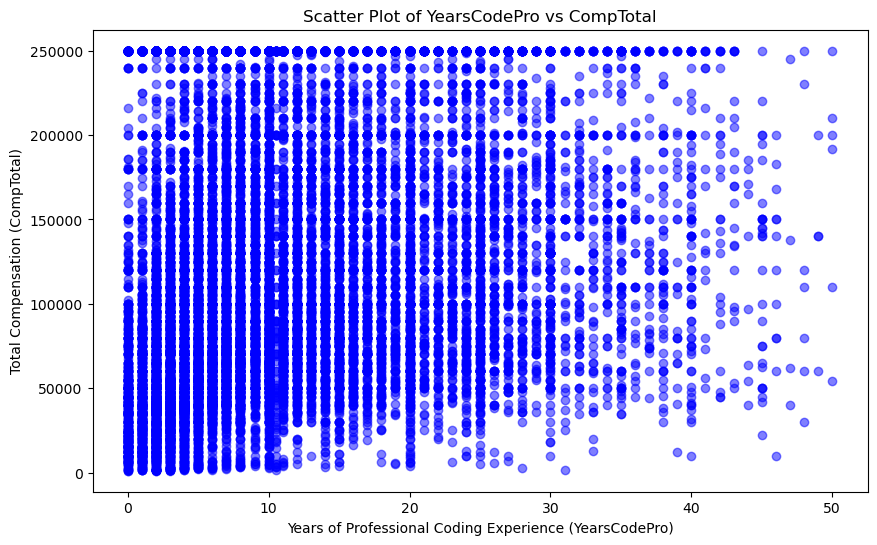

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_q3_encoded['YearsCodePro'], df_q3_encoded['CompTotal'], alpha=0.5, c='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Scatter Plot of YearsCodePro vs CompTotal')

# Show the plot
plt.show()

It is not clear if we can use a linear regression or a polynomial, so letst try a log transformation and then analyze the results again.

Text(0.5, 1.0, 'Scatter Plot of YearsCodePro vs CompTotal')

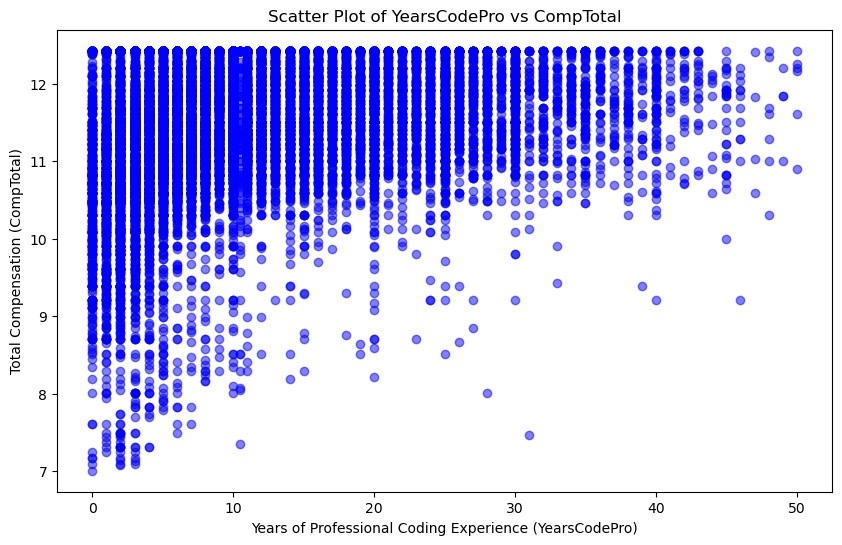

In [14]:
# Log transformation of the target variable
df_q3_encoded['CompTotal_log'] = np.log1p(df_q3_encoded['CompTotal'])

# Import necessary libraries
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_q3_encoded['YearsCodePro'], df_q3_encoded['CompTotal_log'], alpha=0.5, c='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Scatter Plot of YearsCodePro vs CompTotal')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df_q3_encoded.drop(columns=['CompTotal', 'CompTotal_log'])  # Drop original target
y = df_q3_encoded['CompTotal_log']  # Use log-transformed target

# Create polynomial features (degree 2 for quadratic features)
poly = PolynomialFeatures(degree=3, include_bias=False)  # You can experiment with different degrees
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression model (with polynomial features)
ridge_model = Ridge(alpha=1.0)  # You can experiment with the alpha parameter
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.34863872359663733
R-squared score: 0.4541186344129392


In [22]:
# Create a new DataFrame with the years of experience and country flags
country_flags = ['Country_Canada', 'Country_France', 'Country_Germany', 
                 'Country_India', 'Country_Netherlands', 'Country_Poland', 
                 'Country_Spain', 'Country_Ukraine', 
                 'Country_United Kingdom of Great Britain and Northern Ireland', 
                 'Country_United States of America']

# Prepare the input data for prediction
input_data = []

for country in country_flags:
    for years in range(0, 51):  # Assuming you want to predict for 0 to 50 years of experience
        row = [years] + [1 if flag == country else 0 for flag in country_flags]  # Set the country flag
        input_data.append(row)

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data, columns=['YearsCodePro'] + country_flags)

In [23]:
# Create polynomial features
input_poly = poly.transform(input_df)

# Standardize the input features
input_scaled = scaler.transform(input_poly)

In [24]:
# Make predictions using the trained model
predictions = ridge_model.predict(input_scaled)

# Convert predictions back from log scale
predictions_original_scale = np.expm1(predictions)  # Reverse the log transformation

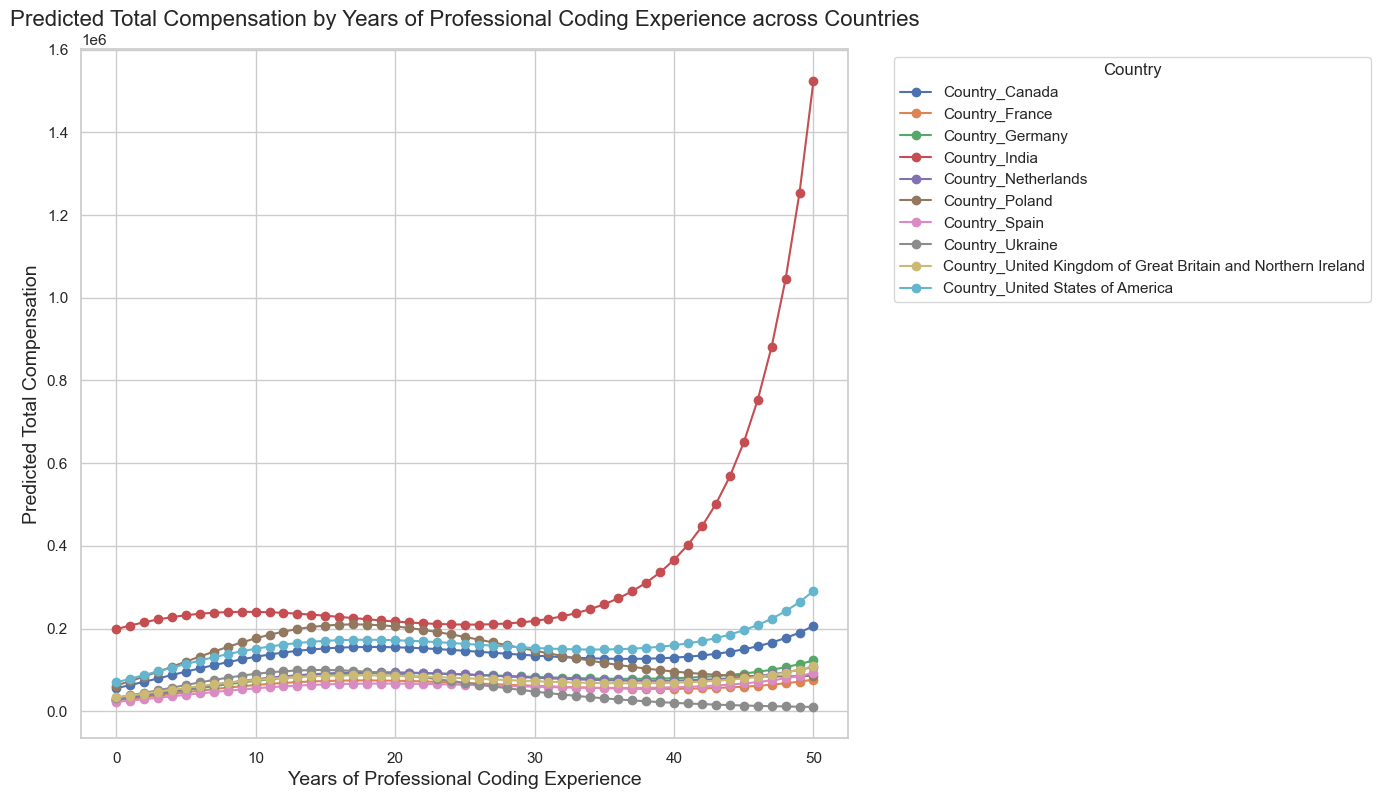

In [25]:
import matplotlib.pyplot as plt

# Add predictions to the input DataFrame
input_df['Predicted_CompTotal'] = predictions_original_scale

# Plotting
plt.figure(figsize=(14, 8))

for country in country_flags:
    subset = input_df[input_df[country] == 1]
    plt.plot(subset['YearsCodePro'], subset['Predicted_CompTotal'], marker='o', label=country)

plt.title('Predicted Total Compensation by Years of Professional Coding Experience across Countries', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Predicted Total Compensation', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
k